### Part d)

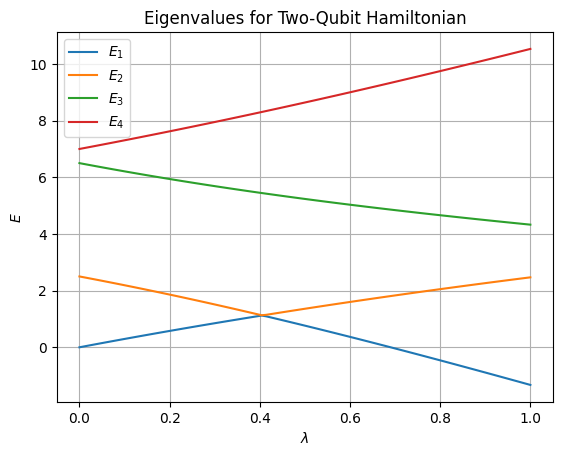

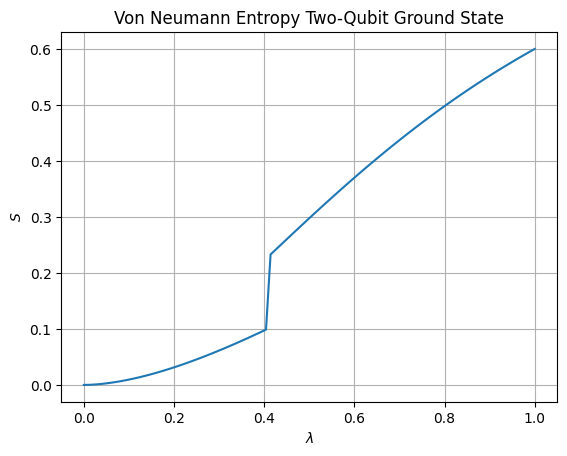

In [ ]:
import sys


from matplotlib import pyplot as plt
import numpy as np

sys.path.insert(0, "../../src/python")
from vqe_binary import exact_energies_and_entropies

lambdas = np.linspace(0, 1, 100)
energies, entropies = exact_energies_and_entropies(lambdas)

plt.figure()
for i in range(energies.shape[1]):
  plt.plot(lambdas, energies[:, i], label=f"$E_{i + 1}$")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$E$")
plt.title("Eigenvalues for Two-Qubit Hamiltonian")
plt.legend()
plt.grid(True)
# plt.savefig("vqe_binary_exact.pdf", format="pdf")
plt.show()

plt.figure()
plt.plot(lambdas, entropies[:, 0])
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$S$")
plt.title("Von Neumann Entropy Two-Qubit Ground State")
plt.grid(True)
# plt.savefig("vqe_binary_entropy.pdf", format="pdf")
plt.show()

### Part e)


Processing lambda = 0.0000 (1/30)
Epoch 50: Energy = 0.046500, Change = 0.014500
Optimization completed after 59 epochs (4.26 seconds)
Final energy: 0.03750000
Final angles: [-0.00383748  0.14203426  3.17805238  3.13001885]

Processing lambda = 0.0345 (2/30)
Epoch 50: Energy = 0.133983, Change = 0.021862
Optimization completed after 97 epochs (6.95 seconds)
Final energy: 0.10358621
Final angles: [ 3.15903213  3.13712514  0.00851426 -0.00918571]

Processing lambda = 0.0690 (3/30)
Epoch 50: Energy = 0.216776, Change = 0.014448
Epoch 100: Energy = 0.198069, Change = 0.006466
Optimization completed after 109 epochs (7.51 seconds)
Final energy: 0.20770690
Final angles: [ 0.00927253 -0.04077308  0.00482437 -0.01659693]

Processing lambda = 0.1034 (4/30)
Epoch 50: Energy = 0.325776, Change = 0.001241
Epoch 100: Energy = 0.315517, Change = 0.022017
Epoch 150: Energy = 0.299966, Change = 0.001914
Epoch 200: Energy = 0.305897, Change = 0.013759
Early stopping after 201 epochs with no improvemen

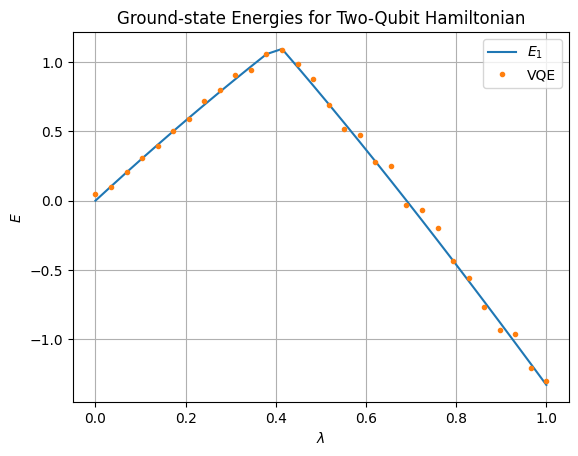

In [ ]:
import sys

from matplotlib import pyplot as plt
import numpy as np

sys.path.insert(0, "../../src/python")
from vqe_binary import (
  exact_energies_and_entropies,
  energy_expectation,
  qiskit_energy_expectation,
)
from vqe_utils import vqe_energies, scipy_vqe_energies

np.random.seed(42)

shots = 1000
learning_rate = 0.1
epochs = 500
lambdas = np.linspace(0, 1.0, 30)

energies_exact, _ = exact_energies_and_entropies(lambdas)

energies_approx, _, _ = vqe_energies(
  4, energy_expectation, lambdas, shots, epochs, learning_rate, "adam", True
)
# energies_approx = scipy_vqe_energies(
#  4, energy_expectation, lambdas, shots, "Powell", 1000, 1e-5
# )

plt.plot(lambdas, energies_exact[:, 0], label="$E_1$")
plt.plot(lambdas, energies_approx, marker=".", linestyle="None", label="VQE")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$E$")
plt.title("Ground-state Energies for Two-Qubit Hamiltonian")
plt.legend()
plt.grid(True)
# plt.savefig("vqe_binary_result.pdf", format="pdf")
plt.show()